In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
# from matplotlib import animation
# import knmi
# import pandas
# from windrose import WindroseAxes, plot_windrose
%matplotlib notebook

<IPython.core.display.Javascript object>


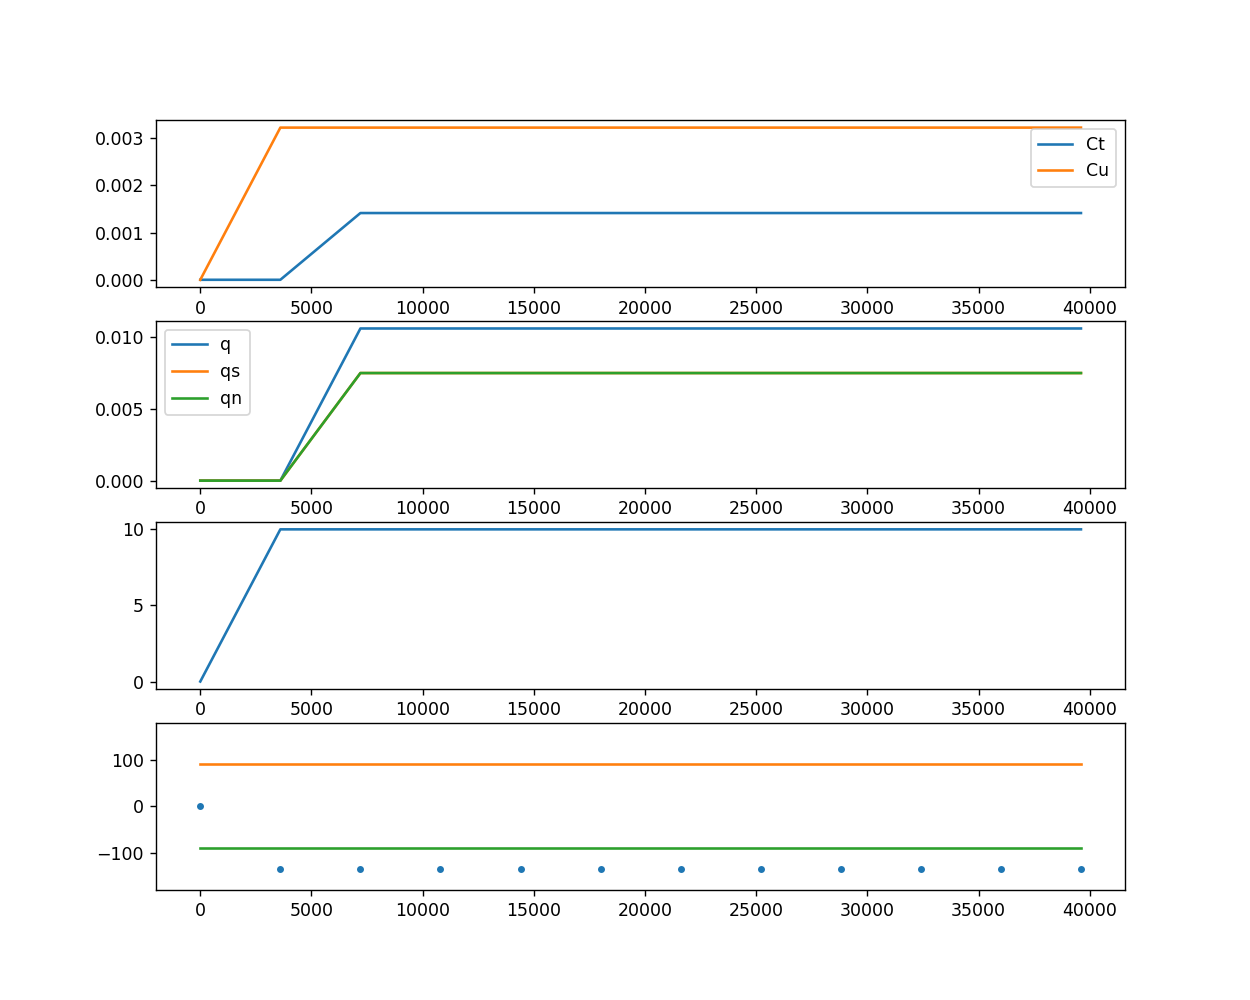

0.01414213515818119

In [110]:
ncfile = 'Run_q1_supply.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    #pickup = ds.variables['pickup'][...]
    #uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    udir= ds.variables['udir'][...]
   # q_sum= ds.variables['q_sum'][...]
   # q_avg= ds.variables['q_avg'][...]
    q= ds.variables['q_sum'][...]
    #qs_sum= ds.variables['qs_sum'][...]
    #q_avg= ds.variables['q_avg'][...]
    qs= ds.variables['qs_sum'][...]
    qn= ds.variables['qn_sum'][...]
    #zs= ds.variables['zs'][...]
    
fig, ax = plt.subplots(4,figsize=(10,8))


#lets place this one at the top.
ax[0].plot(t,Ct[:,5,95,0],label='Ct')
ax[0].plot(t,Cu[:,5,95,0],label='Cu')
ax[0].legend()
#ax[0].plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([6.125, 6.125],[0, 30],'r',lw=1)
#x0.set_xlim([0, 90e3/3600])
ax[1].plot(t,q[:,5,15,0],label='q')
ax[1].plot(t,qs[:,5,15,0],label='qs')
ax[1].plot(t,qn[:,5,15,0],label='qn')
ax[1].legend()

ax[2].plot(t,uw[:,5,95])

ax[3].plot(t,udir[:,5,95],'.')
ax[3].plot(t,np.ones(t.shape)*90)
ax[3].plot(t,np.ones(t.shape)*-90)
ax[3].set_ylim((-180,180))
#ax[2].plot(t,q_sum[:,5,95,0])
q[:,5,95,0].max()

<IPython.core.display.Javascript object>


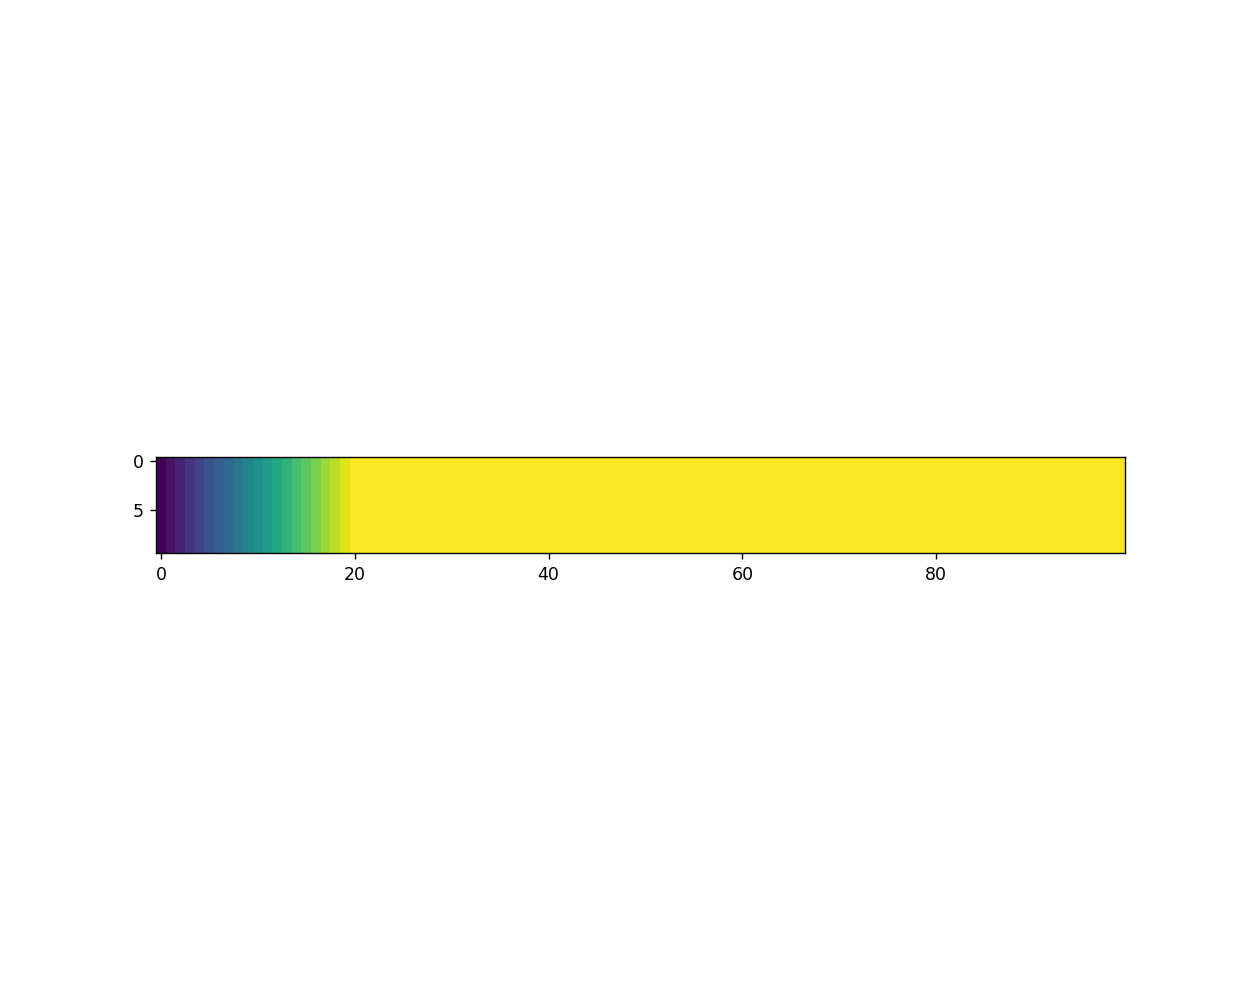

In [160]:
fig, ax = plt.subplots(1,figsize=(10,8))

ax.imshow(Ct[10,:,:,0])




<IPython.core.display.Javascript object>


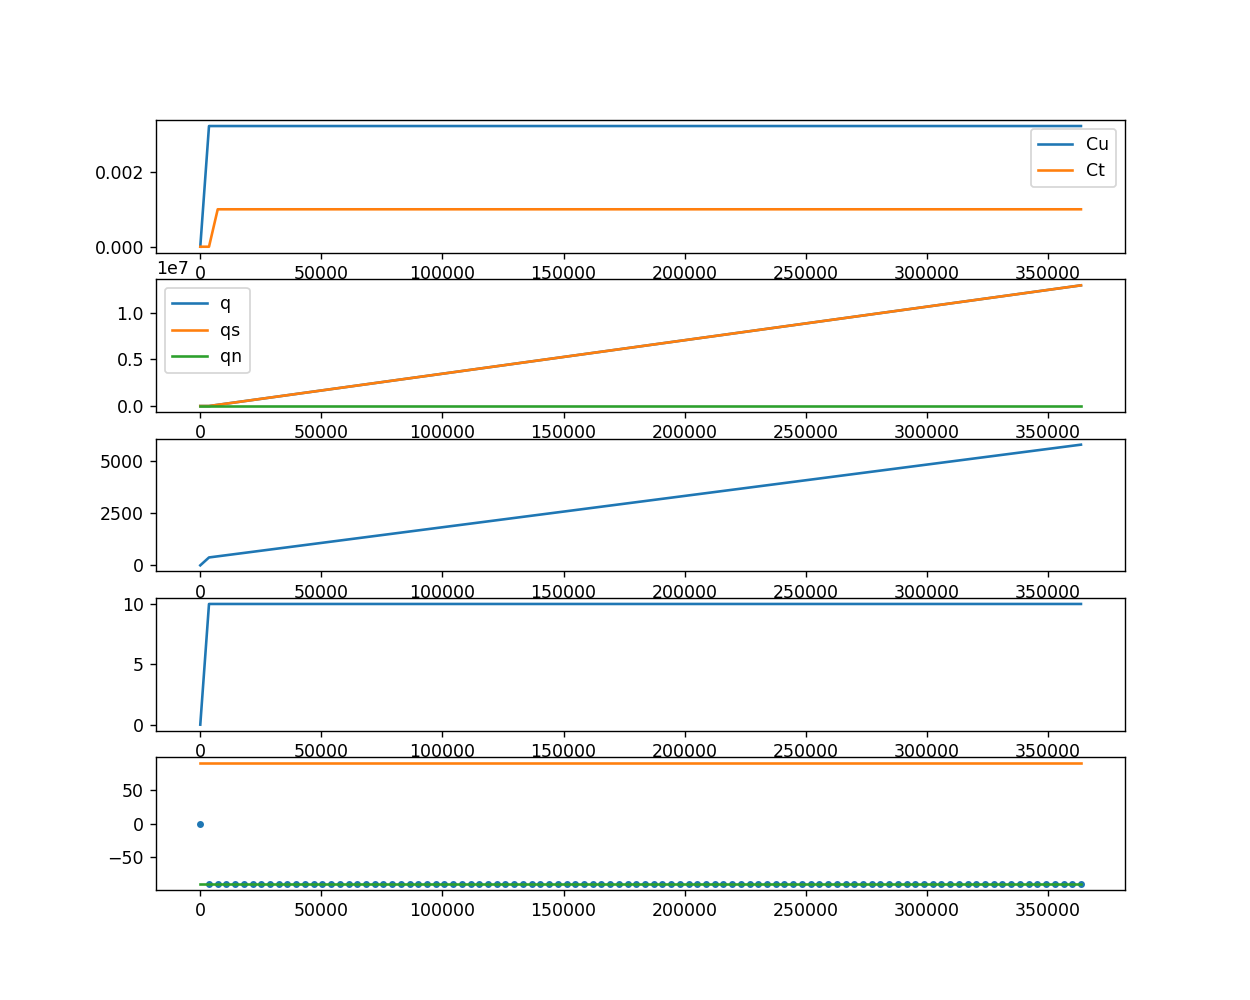

In [157]:
ncfile = 'Run_q1_supply.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    #pickup = ds.variables['pickup'][...]
    #uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    udir= ds.variables['udir'][...]
   # q_sum= ds.variables['q_sum'][...]
   # q_avg= ds.variables['q_avg'][...]
    q= ds.variables['q_sum'][...]
    #qs_sum= ds.variables['qs_sum'][...]
    #q_avg= ds.variables['q_avg'][...]
    qs= ds.variables['qs_sum'][...]
    qn= ds.variables['qn_sum'][...]
    #zs= ds.variables['zs'][...]
    
fig, ax = plt.subplots(5,figsize=(10,8))


#lets place this one at the top.
ax[0].plot(t,Cu[:,5,95,0],label='Cu')
ax[0].plot(t,Ct[:,5,95,0],label='Ct')
ax[0].legend()
#ax[0].plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([6.125, 6.125],[0, 30],'r',lw=1)
#x0.set_xlim([0, 90e3/3600])

# ax[1].plot(t,q[:,5,-5,0],label='q')
# ax[1].plot(t,qs[:,5,-5,0],label='qs')
# ax[1].plot(t,qn[:,5,-5,0],label='qn')
# ax[1].legend()

ax[1].plot(t,np.cumsum(q[:,5,-5,0])*3600,label='q')
ax[1].plot(t,np.cumsum(qs[:,5,-5,0])*3600,label='qs')
ax[1].plot(t,np.cumsum(qn[:,5,-5,0])*3600,label='qn')
ax[1].legend()

ax[2].plot(t,np.squeeze(np.sum(mass,axis=(1,2))),label='mass')

ax[3].plot(t,uw[:,5,95])

ax[4].plot(t,udir[:,5,95],'.')
ax[4].plot(t,np.ones(t.shape)*90)
ax[4].plot(t,np.ones(t.shape)*-90)
#ax[2].plot(t,q_sum[:,5,95,0])


In [167]:
print('cross shore sediment transport', np.cumsum(qs[:,1:,-5,0])[-1])
print('accumulated mass in domain', np.squeeze(np.sum(mass[:,1:,:,:],axis=(1,2)))[-1])
print('total mass in domain', np.squeeze(np.sum(mass[:,1:,:,:],axis=(1,2)))[-1] + np.cumsum(qs[:,1:,-5,0])[-1])
print('total supply', 21*9*0.0005*(360000+3600))
print('Concentration transport', Ct[-1,5,95,0])
print('Concentration equilibrium', Cu[-1,5,95,0])
print('percentage', 21*9*0.0005*(360000+3600)/(np.squeeze(np.sum(mass[:,1:,:,:],axis=(1,2)))[-1] + np.cumsum(qs[:,1:,-5,0])[-1]))


cross shore sediment transport 32400.0
accumulated mass in domain 1960.2000188827515
total mass in domain 34360.20001888275
total supply 34360.2
Concentration transport 0.0010000000474974513
Concentration equilibrium 0.0032244015019387007
percentage 0.9999999994504469


In [156]:
print('cross shore sediment transport', np.cumsum(qs[:,5,-5,0])[-1]*10)
print('accumulated mass in domain', np.squeeze(np.sum(mass,axis=(1,2)))[-1])
print('total mass in domain', np.squeeze(np.sum(mass,axis=(1,2)))[-1] + np.cumsum(qs[:,5,-5,0])[-1]*10)
print('total supply', 21*10*0.0005*(36000+7200))
print('Concentration transport', Ct[-1,5,95,0])
print('Concentration equilibrium', Cu[-1,5,95,0])

cross shore sediment transport 36000.0
accumulated mass in domain 5778.0000829696655
total mass in domain 41778.000082969666
total supply 4536.0
Concentration transport 0.0010000000474974513
Concentration equilibrium 0.0032244015019387007
